## Regression

In [4]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

The dataset: https://opendata-renewables.engie.com/explore/dataset/01c55756-5cd6-4f60-9f63-2d771bb25a1a/information

In [5]:
data = pd.read_csv('data/la-haute-borne-data-2017-2020.csv',sep=';')

In [6]:
data['Date_time'] = pd.to_datetime(data['Date_time'])
data.sort_values(by=['Date_time'], inplace=True, ascending=True)


In [7]:
data = data.drop('Va1_avg', 1)
data = data.drop('Va2_avg', 1)
data = data.drop('Pas_avg', 1)

<ipython-input-7-480b76358e99>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data = data.drop('Va1_avg', 1)
<ipython-input-7-480b76358e99>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data = data.drop('Va2_avg', 1)
<ipython-input-7-480b76358e99>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data = data.drop('Pas_avg', 1)


In [8]:
# features:

# Ws -> Wind Speed
# Gost -> gearbox oil sump temp
# Ot_avg -> outdoor temp
# Rs_avg -> rotor speed
# Rbt_avg -> rotor bearing temp

In [9]:
selected_columns = data[["P_avg","Ws_avg","Gost_avg","Ot_avg","Rs_avg","Rbt_avg"]]
df = selected_columns.copy()
df.dropna(axis = 0, how ='any', inplace=True)
df = df[df['P_avg'].notna()]
df = df[df['Ws_avg'].notna()]
df = df[df['Gost_avg'].notna()]
df = df[df['Ot_avg'].notna()]
df = df[df['Rs_avg'].notna()]
df = df[df['Rbt_avg'].notna()]

In [10]:
x = df[["Ws_avg","Gost_avg","Ot_avg","Rs_avg","Rbt_avg"]]
y = df['P_avg']

In [ ]:
#plot WS_avg
plt.scatter(x['Ws_avg'], y, color='red')
plt.title('x to y', fontsize=14)
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
#plot Gost_avg
plt.scatter(x['Gost_avg'], y, color='red')
plt.title('x to y', fontsize=14)
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
#plot Ot_avg
plt.scatter(x['Ot_avg'], y, color='red')
plt.title('x to y', fontsize=14)
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
#plot Rs_avg
plt.scatter(x['Rs_avg'], y, color='red')
plt.title('x to y', fontsize=14)
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
#plot Rbt_avg
plt.scatter(x['Rbt_avg'], y, color='red')
plt.title('x to y', fontsize=14)
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.grid(True)
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [12]:
from sklearn import linear_model
LinR = linear_model.LinearRegression()
# fitting the training data
model = LinR.fit(x_train,y_train)

In [13]:
plt.rcParams['agg.path.chunksize'] = 10000

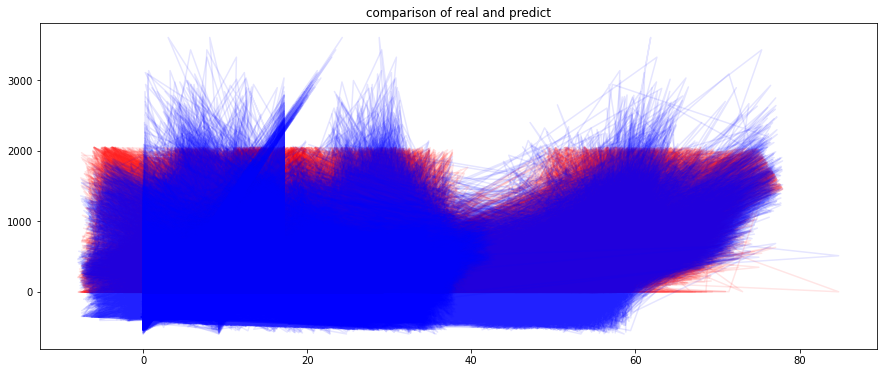

In [14]:
plt.plot(x_train, y_train, color = 'red', alpha=0.1)
plt.plot(x_train, LinR.predict(x_train), color = 'blue', alpha=0.1)
plt.title('comparison of real and predict')
plt.xlabel('')
plt.ylabel('')
plt.show()

In [15]:
print('Coefficients:', model.coef_)

Coefficients: [ 1.69210835e+02 -1.62873678e+00 -4.00643740e+00 -7.82145112e+00
  1.25950115e-01]


In [16]:
y_pred = abs(LinR.predict(x_test)) 
print("MAE: {}".format(np.abs(y_test-y_pred).mean()))
print("RMSE: {}".format(np.sqrt(((y_test-y_pred)**2).mean())))

MAE: 147.5111118868828
RMSE: 196.4384877879046


In [17]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

0.8180119804070599

In [18]:
# features:

# S -> Apparent Power
# Q -> Reactive Power
# Dst -> Generator stator temperatur
# Gb1t -> Gearbox bearing 1 temperature
# Yt -> Nacelle Temperature
# WS1 -> Wind Speed 1
# WS2 -> Wind SPeed 2

In [19]:
selected_columns = data[["P_avg","Q_avg","Dst_avg","Gb1t_avg","Yt_avg","Ws1_avg","Ws2_avg"]]
df2 = selected_columns.copy()
df.dropna(axis = 0, how ='any', inplace=True)
df2 = df2[df2['P_avg'].notna()]
df2 = df2[df2['Q_avg'].notna()]
df2 = df2[df2['Dst_avg'].notna()]
df2 = df2[df2['Gb1t_avg'].notna()]
df2 = df2[df2['Yt_avg'].notna()]
df2 = df2[df2['Ws1_avg'].notna()]
df2 = df2[df2['Ws2_avg'].notna()]


In [20]:
x_2 = df2[["Q_avg","Dst_avg","Gb1t_avg","Yt_avg","Ws1_avg","Ws2_avg"]]
y2 = df2['P_avg']

In [ ]:
#plot Q_avg
plt.scatter(x_2['Q_avg'], y2, color='red')
plt.title('x to y', fontsize=14)
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
#plot Dst_avg
plt.scatter(x_2['Dst_avg'], y2, color='red')
plt.title('x to y', fontsize=14)
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
#plot Gb1t_avg
plt.scatter(x_2['Gb1t_avg'], y2, color='red')
plt.title('x to y', fontsize=14)
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
#plot Yt_avg
plt.scatter(x_2['Yt_avg'], y2, color='red')
plt.title('x to y', fontsize=14)
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
#plot Ws1_avg
plt.scatter(x_2['Ws1_avg'], y2, color='red')
plt.title('x to y', fontsize=14)
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
#plot Ws2_avg
plt.scatter(x_2['Ws2_avg'], y2, color='red')
plt.title('x to y', fontsize=14)
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.grid(True)
plt.show()

In [21]:
from sklearn.model_selection import train_test_split
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(x_2, y2, test_size = 0.2, random_state = 42)

In [22]:
from sklearn import linear_model
LinR = linear_model.LinearRegression()
# fitting the training data
model = LinR.fit(x_train,y_train)

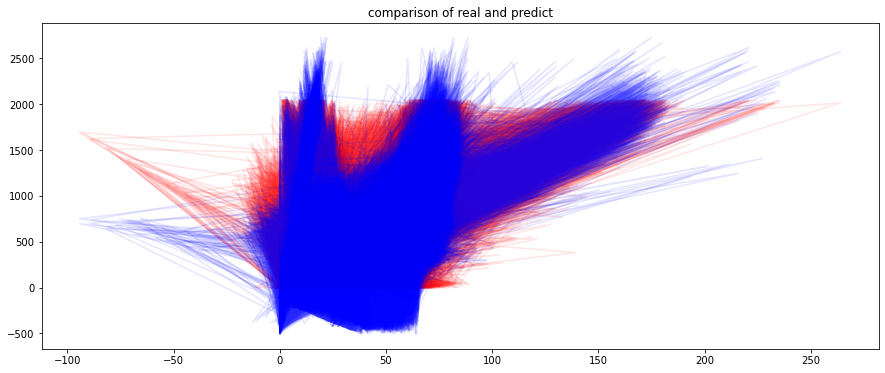

In [23]:
plt.plot(x_train, y_train, color = 'red', alpha=0.1)
plt.plot(x_train, LinR.predict(x_train), color = 'blue', alpha=0.1)
plt.title('comparison of real and predict')
plt.xlabel('')
plt.ylabel('')
plt.show()

In [24]:
print('Coefficients:', model.coef_)

Coefficients: [  3.60610102  -1.92310666   3.15512332 -10.52154912  83.25923334
  24.49296684]


In [25]:
y_pred = abs(LinR.predict(x_test)) 
print("MAE: {}".format(np.abs(y_test-y_pred).mean()))
print("RMSE: {}".format(np.sqrt(((y_test-y_pred)**2).mean())))

MAE: 136.35241381942467
RMSE: 174.4600100150116


In [26]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

0.8555936450440951